In [4]:
!pip install Sastrawi
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
     ---------------------------------------- 0.0/276.1 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/276.1 kB 1.4 MB/s eta 0:00:01
     ---- ---------------------------------- 30.7/276.1 kB 1.4 MB/s eta 0:00:01
     ------ ------------------------------ 51.2/276.1 kB 327.7 kB/s eta 0:00:01
     --------- --------------------------- 71.7/276.1 kB 357.2 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/276.1 kB 403.5 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/276.1 kB 403.5 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/276.1 kB 403.5 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/276.1 kB 403.5 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/276.1 kB 403.5 kB/s eta 0:00:01

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
!pip install matplotlib

^C


In [5]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [6]:
dir = "D:\Anisa Husna Nuha_09010622004/topic-modelling-LDA-skripsi-matematika"

## Visualisasi Data

In [7]:
UINSunanAmpel = pd.read_csv(f"{dir}/dataset/mtk_uinsa2.csv", on_bad_lines='skip')
UINSunanGunungDjati = pd.read_csv(f"{dir}/dataset/mtk_uinsgd2.csv", on_bad_lines='skip')
UINSyahidHida = pd.read_csv(f"{dir}/dataset/mtk_uinshj2.csv", on_bad_lines='skip')
UINSiberSandi = pd.read_csv(f"{dir}/dataset/mtk_uinssn2.csv", on_bad_lines='skip')
UINSunanKalijaga = pd.read_csv(f"{dir}/dataset/mtk_uinsuka2.csv", on_bad_lines='skip')
UINMaliki = pd.read_csv(f"{dir}/dataset/mtk_uinmalik2.csv", on_bad_lines='skip')
UINWalisongo = pd.read_csv(f"{dir}/dataset/mtk_uinwalisongo2.csv", on_bad_lines='skip')

In [8]:
allDF = pd.concat([UINSunanAmpel, UINSunanGunungDjati, UINSyahidHida, UINSiberSandi, UINSunanKalijaga, UINMaliki, UINWalisongo])

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
allDF['university'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Dokumen Setiap Universitas', fontsize=16)
plt.xlabel('Universitas', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

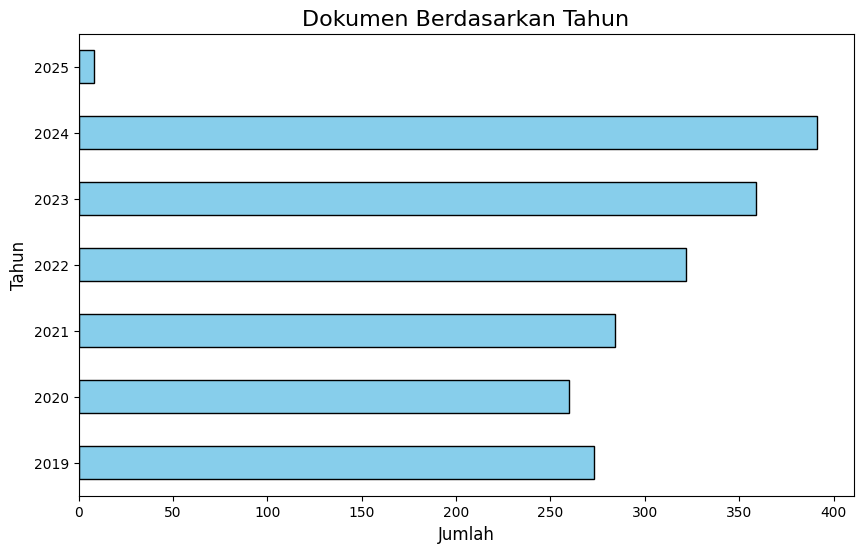

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
allDF['year'].value_counts().sort_index(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Dokumen Berdasarkan Tahun', fontsize=16)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Tahun', fontsize=12)
plt.show()

## Translate 

In [11]:
!pip install deep-translator

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.3 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/42.3 kB 1.3 MB/s eta 0:00:01
     ----------------------------- ---------- 30.7/42.3 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ - 41.0/42.3 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 42.3/42.3 kB 227.3 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
!pip install langdetect

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/981.5 kB ? eta -:--:--
     - ----------------------------------- 30.7/981.5 kB 330.3 kB/s eta 0:00:03
     - ----------------------------------- 30.7/981.5 kB 330.3 kB/s eta 0:00:03
     - ----------------------------------- 51.2/981.5 kB 292.6 kB/s eta 0:00:04
     - ----------------------------------- 51.2/981.5 kB 292.6 kB/s eta 0:00:04
     - ----------------------------------- 51.2/981.5 kB 292.6 kB/s eta 0:00:04
     - ----------------------------------- 51.2/981.5 kB 292.6 kB/s eta 0:00:04
     - ----------------------------------- 51.2/981.5 kB 292.6 kB/s eta 0:00:04
     --- -------------------------------- 102.4/981.5 kB 267.9 kB/s eta 0:00:04
     --- -------------------------------- 102.4/981.5 kB 267.9 kB/s eta 0:00:04
     --- -------------------------------- 102.4/981.5 k

In [14]:
import pandas as pd
from deep_translator import GoogleTranslator
from langdetect import detect

# Fungsi untuk deteksi & translate bahasa
def translate_to_indonesian(text):
    try:
        if detect(text) != 'id':  # Cek apakah bukan Bahasa Indonesia
            return GoogleTranslator(source='auto', target='id').translate(text)
        else:
            return text  # Kalau sudah Bahasa Indonesia, biarkan
    except:
        return text  # Kalau error, biarkan teks asli

In [15]:
# Terapkan ke field "abstrak"
UINSunanAmpel["abstract"] = UINSunanAmpel["abstract"].astype(str).apply(translate_to_indonesian)

UINSunanAmpel2 = UINSunanAmpel.copy()

In [16]:
UINSunanGunungDjati["abstract"] = UINSunanGunungDjati["abstract"].astype(str).apply(translate_to_indonesian)

UINSunanGunungDjati2 = UINSunanGunungDjati.copy()

In [17]:
UINSyahidHida["abstract"] = UINSyahidHida["abstract"].astype(str).apply(translate_to_indonesian)

UINSyahidHida2 = UINSyahidHida.copy()

In [18]:
UINSiberSandi["abstract"] = UINSiberSandi["abstract"].astype(str).apply(translate_to_indonesian)

UINSiberSandi2 = UINSiberSandi.copy()

In [19]:
UINSunanKalijaga["abstract"] = UINSunanKalijaga["abstract"].astype(str).apply(translate_to_indonesian)

UINSunanKalijaga2 = UINSunanKalijaga.copy()

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.1 MB 131.3 kB/s eta 0:01:02
     ---------------------------------------- 0.0/8.1 MB 131.3 kB/s eta 0:01:02
     ---------------------------------------- 0.0/8.1 MB 122.9 kB/s eta 0:01:06
     ---------------------------------------- 0.0/8.1 MB 122.9 kB/s eta 0:01:06
     ---------------------------------------- 0.0/8.1 MB 122.9 kB/s eta 0:01:06
     ---------------------------------------- 0.0/8.1 MB 122.9 kB/s eta 0:01:06
     ---------------------------------------- 0.0/8.1 MB 122.9 kB/s eta 0:01:06
     ---------------------------------------- 0.0/8.1 MB 122.9 kB/s eta 0:01:0

In [20]:
UINMaliki["abstract"] = UINMaliki["abstract"].astype(str).apply(translate_to_indonesian)

UINMaliki2 = UINMaliki.copy()

In [21]:
UINWalisongo["abstract"] = UINWalisongo["abstract"].astype(str).apply(translate_to_indonesian)

UINWalisongo2 = UINWalisongo.copy()

In [38]:
def translate_arab_to_indonesian(text):
    try:
        lang = detect(text)  # Deteksi bahasa
        if lang == 'ar':  # Jika bahasa Arab
            return GoogleTranslator(source='ar', target='id').translate(text)
        elif lang != 'id':  # Jika bukan Bahasa Indonesia atau Arab
            return GoogleTranslator(source='auto', target='id').translate(text)
        else:
            return text  # Jika sudah Bahasa Indonesia, biarkan
    except:
        return text  # Kalau error, biarkan teks asli

In [39]:
UINMaliki2["abstract"] = UINMaliki2["abstract"].astype(str).apply(translate_arab_to_indonesian)

UINMaliki3 = UINMaliki2.copy()

## Pre-processing

In [25]:
import re, string, unicodedata  #modul regular expression
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk import word_tokenize, sent_tokenize  #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

def removeStopword(stringText):
    stop_list = ["yang", "dan", "atau", "adalah", "dari", "untuk", "pada", "dengan", "bahwa", "ini", "itu", "tersebut",
    "matematika", "metode", "teori", "konsep", "rumus", "persamaan", "fungsi", "himpunan", "bilangan",
    "variabel", "konstanta", "koefisien", "teorema", "lemma", "definisi", "proposisi", "bukti", "contoh",
    "soal", "hasil", "kesimpulan", "membahas", "menjelaskan", "menunjukkan", "menerapkan", "menggunakan",
    "diketahui", "diperoleh", "kemudian", "selanjutnya", "berikut", "sehingga", "berdasarkan", "terhadap",
    "integral", "limit", "turunan", "matriks", "vektor", "sistem", "linear", "nonlinier", "aljabar",
    "geometri", "probabilitas", "statistik"]
    stop_words = set(stopwords.words('indonesian')).union(stop_list)
    word_tokens = word_tokenize(stringText)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = [w for w in filtered_sentence if len(w) > 3]
    return filtered_sentence

#remove sentence which contains only one word
def removeSentence(stringText):
    word = stringText.split()
    wordCount = len(word)
    if(wordCount<=1):
        stringText = ''
    return stringText

def cleaning(stringText):
    #remove non-ascii
    stringText = unicodedata.normalize('NFKD', stringText).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    stringText = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', stringText)
    #remove punctuations
    stringText = re.sub(r'[^\w]|_',' ',stringText)
    #remove digit from stringTexting
    stringText = re.sub(r"\S*\d\S*", "", stringText).strip()
    #remove digit or numbers
    stringText = re.sub(r"\b\d+\b", " ", stringText)
    #to lowercase
    stringText = stringText.lower()
    #Remove additional white spaces
    stringText = re.sub(r'[\s]+', ' ', stringText)
    return stringText

def preprocessing(stringText):
    stringText = removeSentence(stringText)
    stringText = cleaning(stringText)
    stringText = removeStopword(stringText)
    stringText = [stemmed_wrapper(word) for word in stringText]
    return " ".join(stringText)

### UIN Sunan Ampel 

In [26]:
len(UINSunanAmpel2)

301

In [27]:
UINSunanAmpel2["abstract"] = UINSunanAmpel2["abstract"].apply(preprocessing)

In [28]:
UINSunanAmpel2.to_csv(f'{dir}/preprocessing/preprocessing_UINSunanAmpel.csv', index=False)

### UIN Sunan Gunung DJati

In [46]:
len(UINSunanGunungDjati2)

367

In [29]:
print(UINSunanGunungDjati2["abstract"].isnull().sum())  # Cek jumlah NaN
print(UINSunanGunungDjati2["abstract"].dtypes)  # Cek tipe data

UINSunanGunungDjati2["abstract"] = UINSunanGunungDjati2["abstract"].fillna("").apply(preprocessing)

0
object


In [30]:
UINSunanGunungDjati2.to_csv(f'{dir}/preprocessing/preprocessing_UINSunanGunungDjati.csv', index=False)

### UIN Syarif Hidayatullah

In [49]:
len(UINSyahidHida2)

288

In [31]:
UINSyahidHida2["abstract"] = UINSyahidHida2["abstract"].apply(preprocessing)

In [32]:
UINSyahidHida2.to_csv(f'{dir}/preprocessing/preprocessing_UINSyarifHidayatullah.csv', index=False)

### UIN Siber Syekh Nurjati

In [52]:
len(UINSiberSandi2)

32

In [33]:
UINSiberSandi2["abstract"] = UINSiberSandi2["abstract"].apply(preprocessing)

In [34]:
UINSiberSandi2.to_csv(f'{dir}/preprocessing/preprocessing_UINSiberSyekhNurjati.csv', index=False)

### UIN Sunan Kalijaga

In [55]:
len(UINSunanKalijaga2)

247

In [35]:
print(UINSunanKalijaga2["abstract"].isnull().sum())  # Cek jumlah NaN
print(UINSunanKalijaga2["abstract"].dtypes)  # Cek tipe data

UINSunanKalijaga2["abstract"] = UINSunanKalijaga2["abstract"].fillna("").apply(preprocessing)

0
object


In [36]:
UINSunanKalijaga2.to_csv(f'{dir}/preprocessing/preprocessing_UINSunanKalijaga.csv', index=False)

### UIN Maulana Malik Ibrahim 

In [58]:
len(UINMaliki3)

574

In [41]:
UINMaliki3["abstract"] = UINMaliki3["abstract"].apply(preprocessing)

In [42]:
UINMaliki3.to_csv(f'{dir}/preprocessing/preprocessing_UINMaulanaMalik.csv', index=False)

### UIN Walisongo

In [61]:
len(UINWalisongo2)

88

In [43]:
UINWalisongo2["abstract"] = UINWalisongo2["abstract"].apply(preprocessing)

In [44]:
UINWalisongo2.to_csv(f'{dir}/preprocessing/preprocessing_UINWalisongo.csv', index=False)